In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


# Question duplicates

The task of identifying duplicated questions can be viewed as an instance of the paraphrase identification problem, which is a well-studied NLP task that uses natural language sentence matching
(NLSM) to determine whether two sentences are paraphrase or not (2). This task has wide array of
useful NLP application. For example, in question-and-answer (QA) forums, there are vast numbers
of duplicate questions. Identifying these duplicates and consolidating their answers increases the
efficiency of such QA forums. Moreover, identifying questions with the same semantic content could
help web-scale question answering systems that are increasingly concentrating on retrieving focused
answers to users’ queries.


In this project, we focus on a dataset published by Quora.com containing over 400K annotated
question pairs containing binary paraphrase labels.1
. We believe that this dataset presents a great
opportunity for the NLP practitioners tue to its scale and quality; it can result in systems that accurately
identify duplicate questions, thus increasing the quality of many QA forums.

In [3]:
df = pd.read_csv('../input/quora-question-pairs/train.csv.zip')

In [4]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. "

### Data Overview

- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate 
- Number of rows in Train.csv = 404,290

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

In [6]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


<AxesSubplot:xlabel='is_duplicate'>

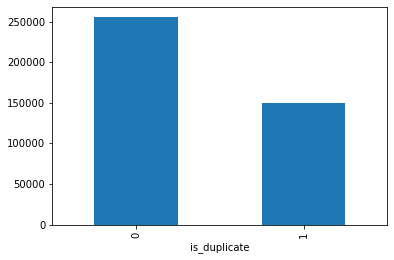

In [7]:
df.groupby('is_duplicate')['id'].count().plot.bar()

In [8]:
#%config Completer.use_jedi = False

In [9]:
print(f'Total number of question pairs is : {len(df)}')

Total number of question pairs is : 404290


In [10]:
print('Total Percentage of questions that are not similar is: {}'.format(round(100-df['is_duplicate'].mean()*100,2)))
print('Total Percentage of questions that are similar is: {}'.format(round(df['is_duplicate'].mean()*100,2)))

Total Percentage of questions that are not similar is: 63.08
Total Percentage of questions that are similar is: 36.92


In [11]:
df['is_duplicate'].mean()

0.369197853026293

In [12]:
quids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
quids
unique_qs = np.unique(quids)
len_unique_qs = len(unique_qs)
print('Length of total questions are:',len(quids))
print('Toal number of unique questions are :',len_unique_qs)
qs_morethan_one = np.sum(quids.value_counts()>1)
print('Question appearing more than once are:',(qs_morethan_one))
print('Percentage of Question appearing more than once are:',(qs_morethan_one/len(unique_qs))*100)
print('Max number of times a single question is asked:',max(quids.value_counts()))

Length of total questions are: 808580
Toal number of unique questions are : 537933
Question appearing more than once are: 111780
Percentage of Question appearing more than once are: 20.77953945937505
Max number of times a single question is asked: 157


In [13]:
q_vals=quids.value_counts()

q_vals=q_vals.values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


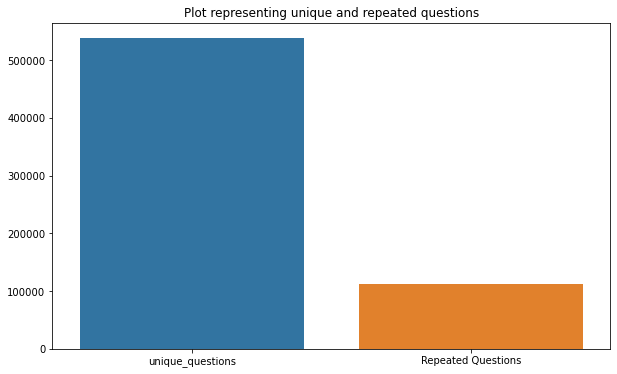

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

x = ["unique_questions" , "Repeated Questions"]
y =  [len_unique_qs , qs_morethan_one]

plt.figure(figsize=(10,6))
plt.title('Plot representing unique and repeated questions')
sns.barplot(x,y)
plt.show()

<h3>Checking for Duplicates </h3>

In [15]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Maximum number of times a single question is repeated: 157



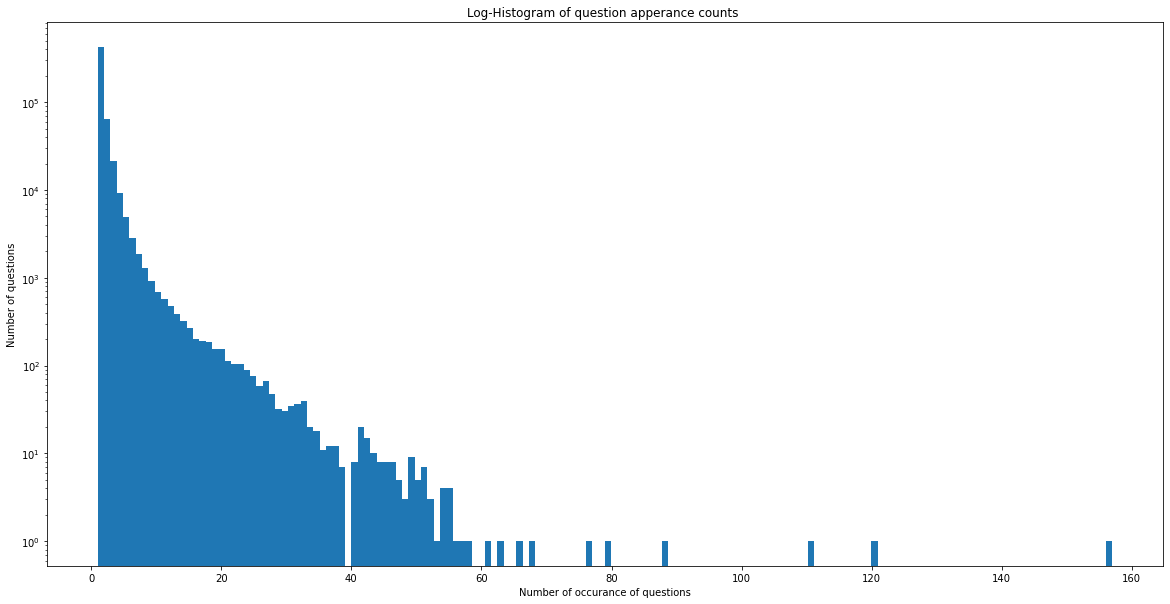

In [16]:
plt.figure(figsize=(20,10))
plt.hist(quids.value_counts(),bins=160)
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of question apperance counts ')
plt.xlabel('Number of occurance of questions')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(quids.value_counts()))) 
plt.show()

In [17]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

There are three null values we can fill with empty string

In [18]:
df=df.fillna('')
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [19]:
df[df['qid1']==3]

,id,qid1,qid2,question1,question2,is_duplicate
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
184732,184732,3,282170,What is the story of Kohinoor (Koh-i-Noor) Dia...,Is it possible to melt down diamonds?,0
263614,263614,3,380197,What is the story of Kohinoor (Koh-i-Noor) Dia...,What are some interesting facts about Kohinoor...,0
359232,359232,3,488853,What is the story of Kohinoor (Koh-i-Noor) Dia...,Could India keep the Koh-I-Noor safe?,0


# Basic Feature Extraction (before cleaning)

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [20]:
# Freqeuncey of qid1 and qid2

df['qid1_freq'] = df.groupby('qid1')['qid1'].transform('count')
df['qid2_freq'] = df.groupby('qid2')['qid2'].transform('count')

#Length of question1 and question2

df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

#Number of words in question1 and question2

df['q1_words'] = df['question1'].apply(lambda x:len(x.split(' ')))
df['q2_words'] = df['question2'].apply(lambda x:len(x.split(' ')))

In [21]:
#common words in question1 and question2
def common_words(row):
    q1_common = set(map(lambda x: x.lower().strip(),row['question1'].split(' ')))
    q2_common = set(map(lambda x: x.lower().strip(),row['question2'].split(' ')))
    return 1.0 * len(q1_common & q2_common)

df['len_common_words'] = df.apply(common_words,axis=1)

In [22]:
#Total number of words in question1 and question2

def word_length(row):
    w1 = set(map(lambda x: x ,row['question1'].split(' ')))
    w2 = set(map(lambda x: x ,row['question2'].split(' ')))
    
    return 1.0 * (len(w1) + len(w2))

df['q1_q2_word_length'] = df.apply(word_length,axis=1)

In [23]:
#word share of question1 and question2

df['word_share'] = df['len_common_words'] / df['q1_q2_word_length']

# qid1 and qid2 frequency sum

df['qid1_qid2_freq'] = df['qid1_freq'] + df['qid2_freq']

# difference of qid1 and qid2 frequency

df['diff_qid1_qid2'] = df['qid1_freq'] - df['qid2_freq']

In [24]:
#save the preprocessed file
df.to_csv('df_fe_without_preprocessing_train.csv',index=False)

In [25]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qid1_freq,qid2_freq,q1_len,q2_len,q1_words,q2_words,len_common_words,q1_q2_word_length,word_share,qid1_qid2_freq,diff_qid1_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


# Analysis of some of the extracted features

In [26]:
print ("Minimum length of the questions in question1 : " , min(df['q1_len']))

print ("Minimum length of the questions in question2 : " , min(df['q2_len']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_len']== 1].shape[0])

print ("Number of Questions with minimum length [question2] :", df[df['q2_len']== 1].shape[0])

Minimum length of the questions in question1 :  0
Minimum length of the questions in question2 :  0
Number of Questions with minimum length [question1] : 19
Number of Questions with minimum length [question2] : 2


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_share', ylabel='Density'>

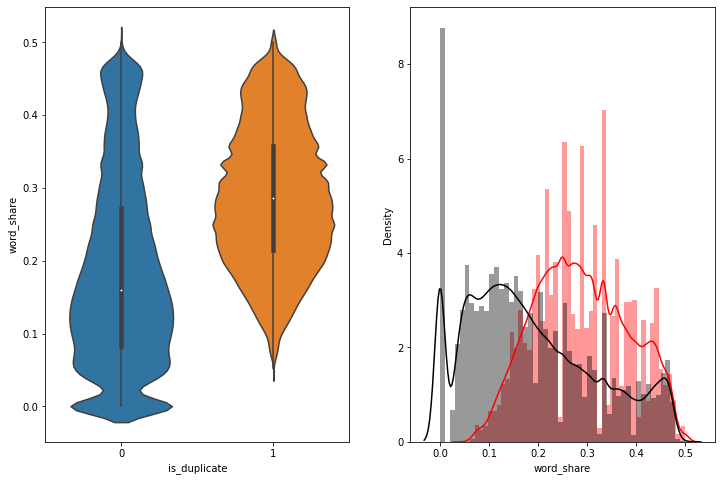

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:],label = 1,color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:],label = 0,color = 'black')

# Word Common

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


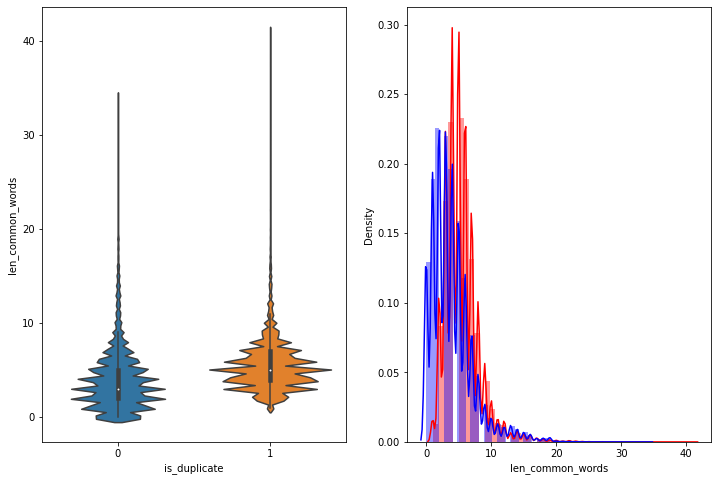

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'len_common_words', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['len_common_words'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['len_common_words'][0:] , label = "0" , color = 'blue' )
plt.show()

# Training the Model for Detecting question duplicates

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import keras.layers as layers
from keras.models import Model
from keras import backend as K
np.random.seed(10)
tf.compat.v1.disable_v2_behavior() 

## Using Universal Sentence Encoder - For creating embedding of text at sentence level

In [30]:
# enabling the pretrained model for trainig our custom model using tensorflow hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
embed = hub.load(module_url)

# creating a method for embedding and will using method for every input layer 
def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x,tf.string)))
 


In [31]:
# Taking the question1 as input and ceating a embedding for each question before feed it to neural network

dropout = 0.1
q1 = layers.Input(shape=(1,),dtype=tf.string)
embeding_q1 = layers.Lambda(UniversalEmbedding,output_shape=(512,))(q1)

# Taking the question2 as input and ceating a embedding for each question before feed it to neural network
q2 = layers.Input(shape=(1,),dtype=tf.string)
embeding_q2 = layers.Lambda(UniversalEmbedding,output_shape=(512,))(q2)

# Concatenating the both input layer
merged = layers.concatenate([embeding_q1,embeding_q2])
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

# Normalizing the input layer,applying dense and dropout  layer for fully connected model and to avoid overfitting 
merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

# Using the Sigmoid as the activation function and binary crossentropy for binary classifcation as 0 or 1
merged = layers.BatchNormalization()(merged)
pred = layers.Dense(2,activation='sigmoid')(merged)
model = Model(inputs=[q1,q2],outputs=pred)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512)          0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512)          0           input_2[0][0]                    
______________________________________________________________________________________________

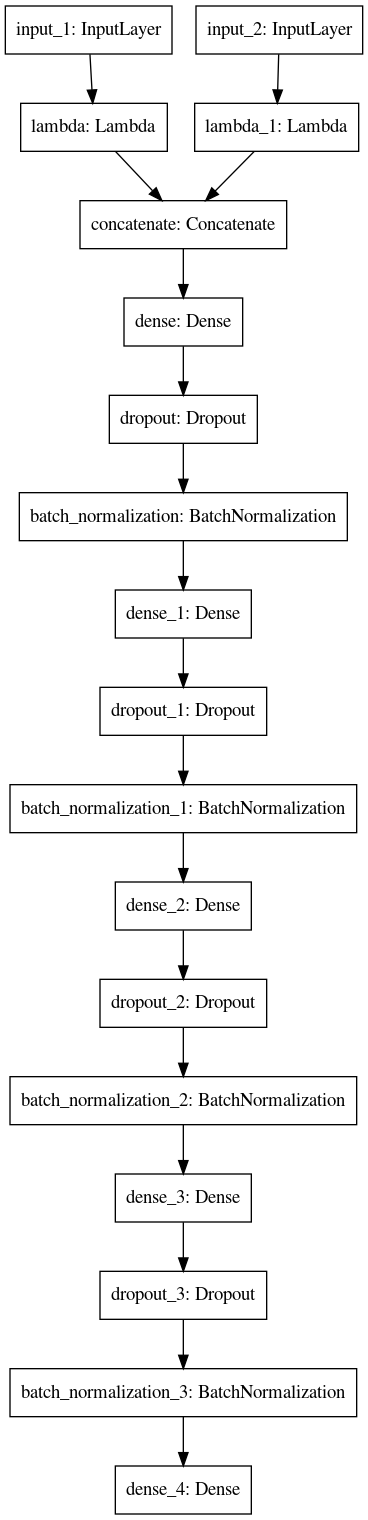

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [33]:
# Pushing all the strings to a list and converting to ndarray
q1= df.question1.tolist()
q2= df.question2.tolist()
labels= df.is_duplicate.tolist()

In [34]:
from sklearn.model_selection import train_test_split
X1 = df['question1']
X2 = df['question2']
y = df['is_duplicate']
# Using the sklearn to split data in question1 and question2 train and test in the ration 80-20 %
X1_train, X1_test,X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

In [35]:
train_q1 = X1_train.tolist()
trainq1 = np.array(train_q1,dtype=object)[:,np.newaxis]
train_q2 = X2_train.tolist()
trainq2 = np.array(train_q2,dtype=object)[:,np.newaxis]

train_labels = np.asarray(pd.get_dummies(y_train),dtype=np.int8)

test_q1 = X1_test.tolist()
test_q1 = np.array(test_q1, dtype=object)[:, np.newaxis]
test_q2 = X2_test.tolist()
test_q2 = np.array(test_q2, dtype=object)[:, np.newaxis]

test_labels = np.asarray(pd.get_dummies(y_test), dtype = np.int8)


# Training the Model

In [36]:
from keras.callbacks import ModelCheckpoint
tf.compat.v1.disable_v2_behavior() 

with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    
    filepath = 'model-{epoch:02d}-{val_acc:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath,monitor = 'val_loss',save_best_only=False,save_weights_only=True,mode='auto',period=1)
    callback_list = [checkpoint]
    
    history = model.fit([trainq1,trainq2],train_labels,
                        validation_data=([test_q1,test_q2],test_labels),
                        epochs=10,
                        batch_size=512,callbacks=callback_list)
    model.save('final_model.h5')

Train on 323432 samples, validate on 80858 samples
Epoch 1/10
323432/323432 [==============================] - ETA: 0s - loss: 0.4731 - acc: 0.7680

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


323432/323432 [==============================] - 473s 1ms/sample - loss: 0.4731 - acc: 0.7680 - val_loss: 0.4081 - val_acc: 0.8039
Epoch 2/10
323432/323432 [==============================] - 416s 1ms/sample - loss: 0.3593 - acc: 0.8338 - val_loss: 0.3443 - val_acc: 0.8398
Epoch 3/10
323432/323432 [==============================] - 414s 1ms/sample - loss: 0.3193 - acc: 0.8569 - val_loss: 0.3276 - val_acc: 0.8508
Epoch 4/10
323432/323432 [==============================] - 413s 1ms/sample - loss: 0.2923 - acc: 0.8709 - val_loss: 0.3259 - val_acc: 0.8538
Epoch 5/10
323432/323432 [==============================] - 414s 1ms/sample - loss: 0.2729 - acc: 0.8803 - val_loss: 0.3185 - val_acc: 0.8595
Epoch 6/10
323432/323432 [==============================] - 413s 1ms/sample - loss: 0.2576 - acc: 0.8882 - val_loss: 0.3187 - val_acc: 0.8612
Epoch 7/10
323432/323432 [==============================] - 413s 1ms/sample - loss: 0.2431 - acc: 0.8952 - val_loss: 0.3211 - val_acc: 0.8624
Epoch 8/10
323432

In [37]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")

Type Question 1 here -->is python good programming language for machine learning
Type Question 2 here -->which programming language is good for machine learning
----FINAL RESULT----
****Questions are not Similar****


In [38]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")

Type Question 1 here -->what are the different strategies to make money in stock market
Type Question 2 here -->Please can anybody tell me strategies to make money in stock market
----FINAL RESULT----
****Questions are Similar****


In [ ]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")